#### IMPORTS

In [1]:
import torch
import numpy as np
import os
#system oath /home/karansingh/Documents/summer-term/ECG_ML/MAIN

#sys.path.append('/home/karansingh/Documents/summer-term/ECG_ML/MAIN')
import sys
sys.path.append('/home/karansingh/Documents/summer-term/ECG_ML/MAIN')
from dataloader import MyCustomDataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim


from model_nn import  Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
default_dir = os.getcwd()
def default_directory():
    os.chdir(f"{default_dir}")
    print(f"you are back to the default directory: {default_dir}")


In [3]:
default_directory()
os.getcwd()

you are back to the default directory: /home/karansingh/Documents/summer term/ECG_ML/MAIN


'/home/karansingh/Documents/summer term/ECG_ML/MAIN'

In [4]:
os.chdir("ML/Data_herm")
os.getcwd()

'/home/karansingh/Documents/summer term/ECG_ML/MAIN/ML/Data_herm'

In [5]:
os.listdir()

['disease_SB_herm_100_1.txt',
 'disease_SR_herm_100_2.txt',
 'disease_SB_herm_100_0.txt',
 'disease_ST_herm_100_9.txt',
 'disease_SR_herm_100_4.txt',
 'disease_ST_herm_100_7.txt',
 'disease_SB_herm_100_5.txt',
 'disease_SB_herm_100_6.txt',
 'disease_SR_herm_100_9.txt',
 'disease_ST_herm_100_8.txt',
 'disease_ST_herm_100_4.txt',
 'disease_SR_herm_100_8.txt',
 'disease_SB_herm_100_9.txt',
 'disease_SB_herm_100_7.txt',
 'disease_SR_herm_100_7.txt',
 'disease_SB_herm_100_8.txt',
 'disease_ST_herm_100_6.txt',
 'disease_SB_herm_100_4.txt',
 'disease_ST_herm_100_1.txt',
 'disease_SB_herm_100_3.txt',
 'disease_ST_herm_100_2.txt',
 'disease_ST_herm_100_5.txt',
 'disease_ST_herm_100_0.txt',
 'disease_SR_herm_100_0.txt',
 'disease_SB_herm_100_2.txt',
 'disease_SR_herm_100_5.txt',
 'disease_ST_herm_100_3.txt',
 'disease_SR_herm_100_3.txt',
 'disease_SR_herm_100_6.txt',
 'disease_SR_herm_100_1.txt']

#### LOAD DATA

In [6]:
## Create fake dataset for demonstration purposes

## Load your dataset and use 


data_ST_list = []
for i in range(10):
    cc = np.loadtxt('disease_ST_herm_100_'+str(i)+'.txt')
    data_ST_list.append(cc)
    print(f"data st of length {len(cc)} in {i} index loaded")


data_ST_list = np.array(data_ST_list)
images = np.resize(data_ST_list,(5000,10000))

labels=np.zeros(5000)

data_SB_list = []
for i in range(10):
    cc = np.loadtxt('disease_SB_herm_100_'+str(i)+'.txt')
    data_SB_list.append(cc)
    print(f"data sb of length {len(cc)} in {i} index loaded")
images = np.concatenate((images,np.resize(data_SB_list,(5000,10000))))
labels=np.concatenate((labels,np.ones(5000)))

data_SR_list = []
for i in range(10):
    cc = np.loadtxt('disease_SR_herm_100_'+str(i)+'.txt')
    data_SR_list.append(cc)
    print(f"data sr of length {len(cc)} in {i} index loaded")
images = np.concatenate((images,np.resize(data_SR_list,(5000,10000))))
labels=np.concatenate((labels,np.ones(5000)*2))
                    

data st of length 300 in 0 index loaded
data st of length 300 in 1 index loaded
data st of length 300 in 2 index loaded
data st of length 300 in 3 index loaded
data st of length 300 in 4 index loaded
data st of length 300 in 5 index loaded
data st of length 300 in 6 index loaded
data st of length 300 in 7 index loaded
data st of length 300 in 8 index loaded
data st of length 300 in 9 index loaded
data sb of length 500 in 0 index loaded
data sb of length 500 in 1 index loaded
data sb of length 500 in 2 index loaded
data sb of length 500 in 3 index loaded
data sb of length 500 in 4 index loaded
data sb of length 500 in 5 index loaded
data sb of length 500 in 6 index loaded
data sb of length 500 in 7 index loaded
data sb of length 500 in 8 index loaded
data sb of length 500 in 9 index loaded
data sr of length 500 in 0 index loaded
data sr of length 500 in 1 index loaded
data sr of length 500 in 2 index loaded
data sr of length 500 in 3 index loaded
data sr of length 500 in 4 index loaded


In [7]:
default_directory()
print(len(images),len(labels))
from model_cnn import SmallCNN
print(images.shape)
images = images.reshape(15000,1,100,100)
images.shape



you are back to the default directory: /home/karansingh/Documents/summer term/ECG_ML/MAIN
15000 15000
(15000, 10000)


(15000, 1, 100, 100)

#### CREATE BATCHES

In [8]:
# Create an instance of your dataset

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
train_dataset = MyCustomDataset(images_train, labels_train)
test_dataset = MyCustomDataset(images_test, labels_test)
# Define a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#### TRAINING PARAMETERS

In [9]:
torch.manual_seed(37)  # Set seed for reproducibility
model = SmallCNN()

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer
def accuracy(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


#### TRAINING

In [10]:
test_losses_list=[]
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SmallCNN().to(device)

with torch.no_grad():
    model.eval()
    test_loss, accuracy_test = 0.0, 0.0
    for i, (images, labels) in enumerate(test_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        accuracy_test += accuracy(labels, outputs.argmax(dim=1))
test_losses_list.append(test_loss / len(test_dataloader))

print(accuracy_test / len(test_dataloader))

32.33599290780142


In [11]:
!nvidia-smi


Sun Sep  7 00:26:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 575.64.03              Driver Version: 575.64.03      CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050        Off |   00000000:01:00.0 Off |                  N/A |
|  0%   43C    P8              8W /   70W |     630MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [22]:
import copy
import torch
import torch.nn as nn

torch.manual_seed(27)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SmallCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)

# Scheduler (reduce LR when test loss plateaus)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=3
)

def correct(pred, true): 
    """Returns the number of correct predictions.
    which will use to calculate accuracy.
    """
    return (pred == true).sum().item()


num_epochs, patience = 35, 7
train_losses_list, test_losses_list, accuracy_train_list, accuracy_test_list = [], [], [], []
best_acc, wait, best_model = 0, 0, None

for epoch in range(num_epochs):
    # --- Train ---
    model.train(); run_loss = 0; c_train = t_train = 0
    for x, y in train_dataloader:
        x, y = x.to(device), y.to(device)
        out = model(x); loss = criterion(out, y)
        optimizer.zero_grad(); loss.backward(); optimizer.step()
        run_loss += loss.item()
        c_train += correct(out.argmax(1), y); t_train += y.size(0)
    train_losses_list.append(run_loss/len(train_dataloader))
    accuracy_train_list.append(100*c_train/t_train)

    # --- Test ---
    model.eval(); run_loss = 0; c_test = t_test = 0
    with torch.no_grad():
        for x, y in test_dataloader:
            x, y = x.to(device), y.to(device)
            out = model(x); loss = criterion(out, y)
            run_loss += loss.item()
            c_test += correct(out.argmax(1), y); t_test += y.size(0)
    test_losses_list.append(run_loss/len(test_dataloader))
    accuracy_test_list.append(100*c_test/t_test)

    # --- LR scheduler step ---
    scheduler.step(test_losses_list[-1])
    # Print LR (optional)
    lr_now = optimizer.param_groups[0]['lr']

    # --- Early stopping ---
    if accuracy_test_list[-1] > best_acc:
        best_acc, wait = accuracy_test_list[-1], 0
        best_model = copy.deepcopy(model.state_dict())
    else:
        wait += 1
        if wait >= patience:
            print(f"##Early stopping at epoch {epoch+1}##")
            break

    print(f"Epoch [{epoch+1}/{num_epochs}] | "
          f"Train Loss: {train_losses_list[-1]:.4f}, Test Loss: {test_losses_list[-1]:.4f}, "
          f"Train Acc: {accuracy_train_list[-1]:.2f}, Test Acc: {accuracy_test_list[-1]:.2f}, "
          f"LR: {lr_now:.6f}")

# Restore best weights
model.load_state_dict(best_model)
print(f" Best Test Accuracy: {best_acc:.2f}")


Epoch [1/35] | Train Loss: 0.7387, Test Loss: 0.4699, Train Acc: 67.12, Test Acc: 80.63, LR: 0.000010
Epoch [2/35] | Train Loss: 0.3978, Test Loss: 0.2718, Train Acc: 85.35, Test Acc: 90.73, LR: 0.000010
Epoch [3/35] | Train Loss: 0.2787, Test Loss: 0.2351, Train Acc: 90.35, Test Acc: 90.73, LR: 0.000010
Epoch [4/35] | Train Loss: 0.2291, Test Loss: 0.1874, Train Acc: 92.09, Test Acc: 93.50, LR: 0.000010
Epoch [5/35] | Train Loss: 0.1951, Test Loss: 0.1631, Train Acc: 93.17, Test Acc: 94.93, LR: 0.000010
Epoch [6/35] | Train Loss: 0.1764, Test Loss: 0.1590, Train Acc: 93.92, Test Acc: 94.10, LR: 0.000010
Epoch [7/35] | Train Loss: 0.1663, Test Loss: 0.1361, Train Acc: 94.12, Test Acc: 96.30, LR: 0.000010
Epoch [8/35] | Train Loss: 0.1553, Test Loss: 0.1390, Train Acc: 94.74, Test Acc: 95.07, LR: 0.000010
Epoch [9/35] | Train Loss: 0.1436, Test Loss: 0.1243, Train Acc: 95.04, Test Acc: 95.57, LR: 0.000010
Epoch [10/35] | Train Loss: 0.1375, Test Loss: 0.1240, Train Acc: 95.14, Test Acc:

In [19]:
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SmallCNN().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.9, weight_decay=1e-4)
# optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 20
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/20], Train Loss: 0.7783, Test Loss: 0.4138, Train Accuracy: 64.6333, Test Accuracy: 85.4942
Epoch [2/20], Train Loss: 0.3784, Test Loss: 0.2387, Train Accuracy: 86.4167, Test Accuracy: 92.7083
Epoch [3/20], Train Loss: 0.2608, Test Loss: 0.1837, Train Accuracy: 91.0667, Test Accuracy: 93.9827
Epoch [4/20], Train Loss: 0.2167, Test Loss: 0.1643, Train Accuracy: 92.5667, Test Accuracy: 94.6476
Epoch [5/20], Train Loss: 0.1876, Test Loss: 0.1409, Train Accuracy: 93.3750, Test Accuracy: 95.6117
Epoch [6/20], Train Loss: 0.1712, Test Loss: 0.1410, Train Accuracy: 94.3500, Test Accuracy: 95.8777
Epoch [7/20], Train Loss: 0.1635, Test Loss: 0.1325, Train Accuracy: 94.4250, Test Accuracy: 96.3763
Epoch [8/20], Train Loss: 0.1540, Test Loss: 0.1239, Train Accuracy: 94.6083, Test Accuracy: 96.6090
Epoch [9/20], Train Loss: 0.1529, Test Loss: 0.1416, Train Accuracy: 94.6500, Test Accuracy: 94.6476
Epoch [10/20], Train Loss: 0.1351, Test Loss: 0.1175, Train Accuracy: 95.3750, Test Accurac

In [12]:
import copy
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
""" training for seeds 20-50 taking max accuracy model
"""
# === CONFIG ===
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs, patience = 25, 7
seeds = range(20, 50)   # from 20 to 50

# To store results for all seeds
all_train_losses, all_test_losses = {}, {}
all_train_acc, all_test_acc = {}, {}

best_acc_overall, best_seed, best_model_state = 0, None, None

def correct(pred, true): 
    return (pred == true).sum().item()

# === LOOP OVER SEEDS ===
for seed in seeds:
    torch.manual_seed(seed)

    # Model, optimizer, scheduler
    model = SmallCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="min", factor=0.5, patience=3
    )

    # Logs for this run
    train_losses_list, test_losses_list = [], []
    accuracy_train_list, accuracy_test_list = [], []

    best_acc, wait, best_model = 0, 0, None

    for epoch in range(num_epochs):
        # --- Train ---
        model.train(); run_loss = 0; c_train = t_train = 0
        for x, y in train_dataloader:
            x, y = x.to(device), y.to(device)
            out = model(x); loss = criterion(out, y)
            optimizer.zero_grad(); loss.backward(); optimizer.step()
            run_loss += loss.item()
            c_train += correct(out.argmax(1), y); t_train += y.size(0)
        train_losses_list.append(run_loss/len(train_dataloader))
        accuracy_train_list.append(100*c_train/t_train)

        # --- Test ---
        model.eval(); run_loss = 0; c_test = t_test = 0
        with torch.no_grad():
            for x, y in test_dataloader:
                x, y = x.to(device), y.to(device)
                out = model(x); loss = criterion(out, y)
                run_loss += loss.item()
                c_test += correct(out.argmax(1), y); t_test += y.size(0)
        test_losses_list.append(run_loss/len(test_dataloader))
        accuracy_test_list.append(100*c_test/t_test)

        # --- LR schedule ---
        scheduler.step(test_losses_list[-1])

        # --- Early stopping ---
        if accuracy_test_list[-1] > best_acc:
            best_acc, wait = accuracy_test_list[-1], 0
            best_model = copy.deepcopy(model.state_dict())
            if best_acc > 98.6:
                print(f"Seed {seed}: Early stopping at epoch {epoch+1}")
                break
        else:
            wait += 1
            if wait >= patience:
                print(f"Seed {seed}: Early stopping at epoch {epoch+1}")
                break

    # Save results for this seed
    all_train_losses[seed] = train_losses_list
    all_test_losses[seed] = test_losses_list
    all_train_acc[seed] = accuracy_train_list
    all_test_acc[seed] = accuracy_test_list

    # Check if this seed gave the best accuracy overall
    if best_acc > best_acc_overall:
        best_acc_overall, best_seed = best_acc, seed
        best_model_state = best_model

    print(f"Seed {seed}: Best Test Accuracy = {best_acc:.2f}")

# === Save best model ===
torch.save(best_model_state, f"best_model_seed_{best_seed}.pth")
print(f"\nBest overall seed = {best_seed}, Accuracy = {best_acc_overall:.2f}")


Seed 20: Best Test Accuracy = 96.70
Seed 21: Best Test Accuracy = 97.00
Seed 22: Early stopping at epoch 21
Seed 22: Best Test Accuracy = 96.43
Seed 23: Best Test Accuracy = 97.10
Seed 24: Best Test Accuracy = 96.83
Seed 25: Early stopping at epoch 22
Seed 25: Best Test Accuracy = 96.70
Seed 26: Best Test Accuracy = 97.07
Seed 27: Best Test Accuracy = 97.07
Seed 28: Best Test Accuracy = 96.83
Seed 29: Best Test Accuracy = 97.03
Seed 30: Early stopping at epoch 20
Seed 30: Best Test Accuracy = 96.70
Seed 31: Early stopping at epoch 15
Seed 31: Best Test Accuracy = 95.63
Seed 32: Best Test Accuracy = 97.43
Seed 33: Best Test Accuracy = 97.23
Seed 34: Best Test Accuracy = 97.17
Seed 35: Best Test Accuracy = 96.63
Seed 36: Early stopping at epoch 25
Seed 36: Best Test Accuracy = 96.83
Seed 37: Best Test Accuracy = 97.17
Seed 38: Best Test Accuracy = 97.00
Seed 39: Best Test Accuracy = 97.13
Seed 40: Best Test Accuracy = 97.30
Seed 41: Best Test Accuracy = 96.97
Seed 42: Best Test Accuracy 

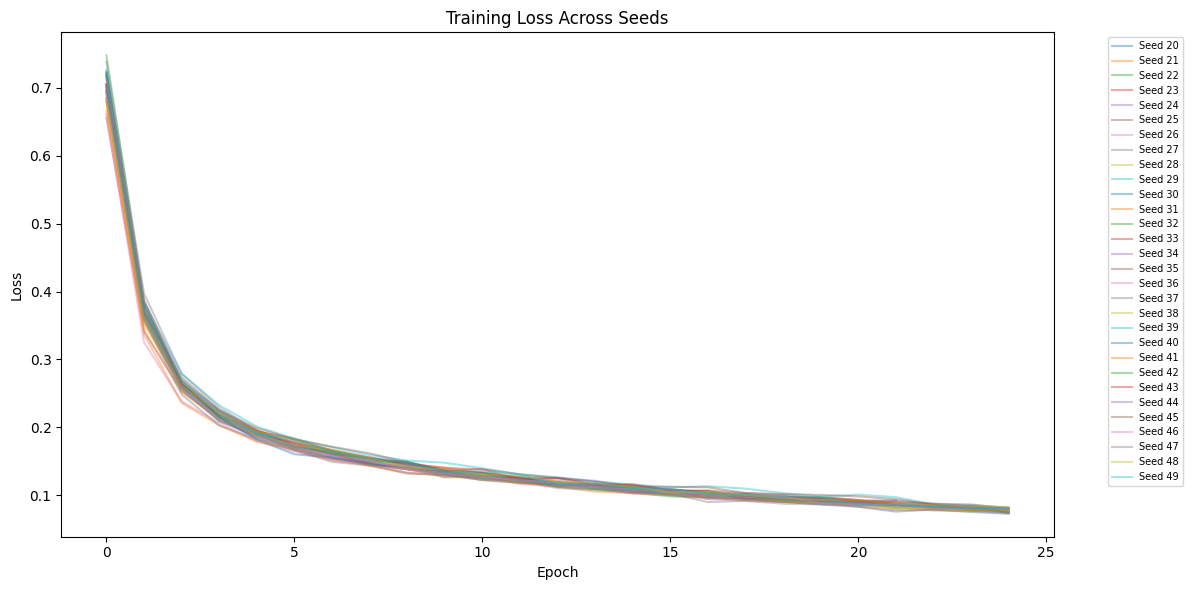

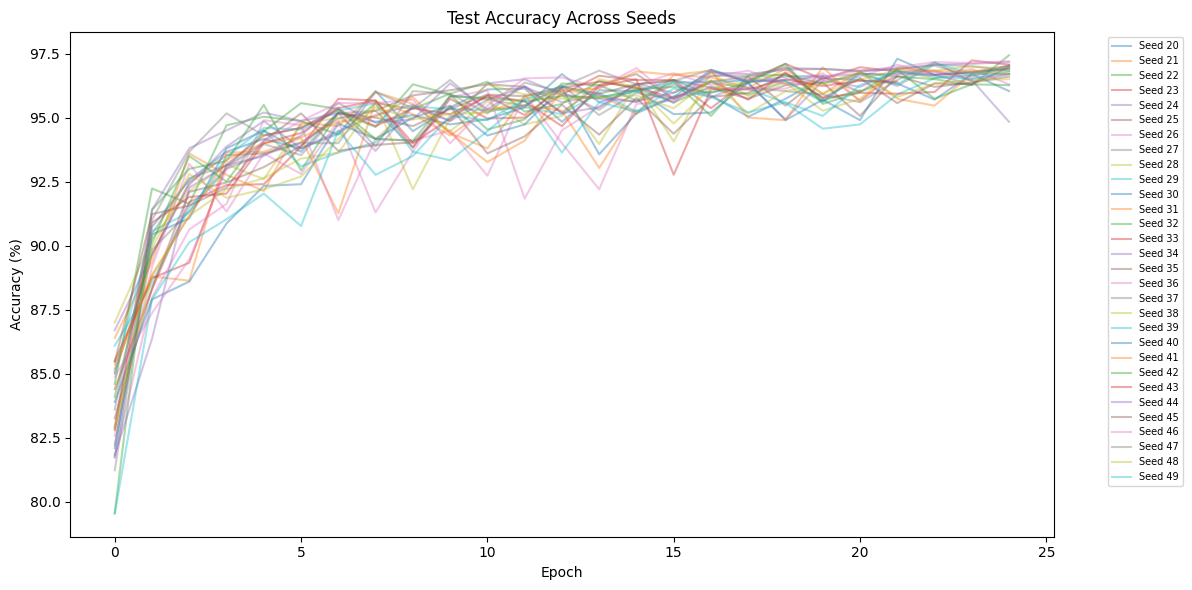

In [13]:
# --- Plot Training Loss for all seeds ---
plt.figure(figsize=(12,6))
for seed, losses in all_train_losses.items():
    plt.plot(losses, alpha=0.4, label=f"Seed {seed}")
plt.title("Training Loss Across Seeds")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=7)
plt.tight_layout()
plt.show()

# --- Plot Test Accuracy for all seeds ---
plt.figure(figsize=(12,6))
for seed, acc in all_test_acc.items():
    plt.plot(acc, alpha=0.4, label=f"Seed {seed}")
plt.title("Test Accuracy Across Seeds")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize=7)
plt.tight_layout()
plt.show()


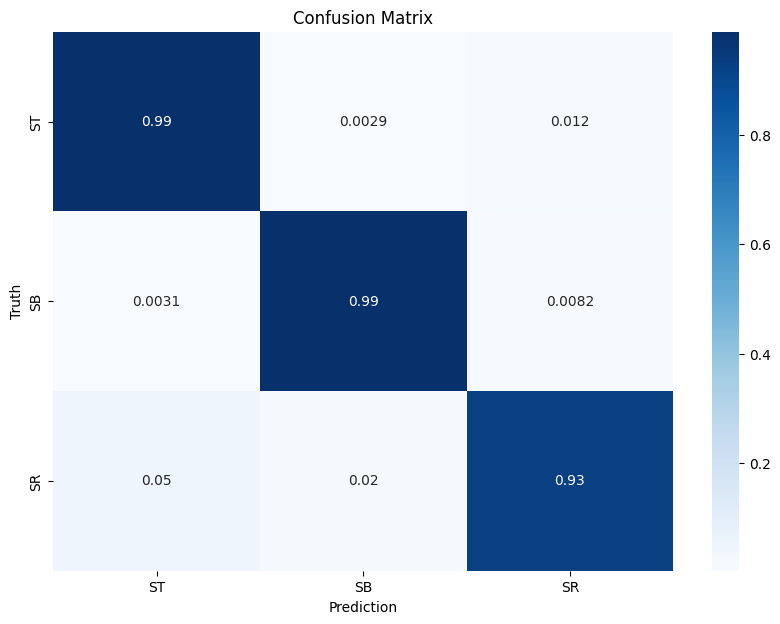

In [14]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import torch.nn.functional as F

model.eval()
y_pred = []
y_true = []
y_scores = []  # Added to collect probability scores

with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model(images.to(device))
        # Get probability scores using softmax
        probabilities = F.softmax(outputs, dim=1)
        y_scores.extend(probabilities.cpu().numpy())
        
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Convert to numpy arrays
y_scores = np.array(y_scores)

cm = confusion_matrix(y_true, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix
df_cm = pd.DataFrame(cm, index=["ST", "SB", "SR"], columns=["ST", "SB", "SR"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [15]:

#Classification Report for Test Data:

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["ST", "SB", "SR"]))


              precision    recall  f1-score   support

          ST       0.95      0.99      0.97      1037
          SB       0.98      0.99      0.98       970
          SR       0.98      0.93      0.95       993

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [21]:
import pickle
import os
import ipynbname

# Get current notebook name
try:
    # Get notebook name (without .ipynb extension)
    notebook_name = ipynbname.name()

except:
    notebook_name = "Notebook"  # fallback if can't get notebook name

# Create folder with notebook name if it doesn't exist
if not os.path.exists(notebook_name):
    os.makedirs(notebook_name)

# Path to save
save_path = os.path.join(notebook_name, "all_results.pkl")

# Save results
results = {
    "train_losses": all_train_losses,
    "test_losses": all_test_losses,
    "train_acc": all_train_acc,
    "test_acc": all_test_acc,
    "best_seed": best_seed,
    "best_acc": best_acc_overall,
}

with open(save_path, "wb") as f:
    pickle.dump(results, f)

torch.save(best_model_state, os.path.join(notebook_name, f"best_model{best_seed}.pth"))

print(f" Saved all training histories to {save_path}")


 Saved all training histories to main_cnn100_herm/all_results.pkl


Average precision score, micro-averaged over all classes: 0.99


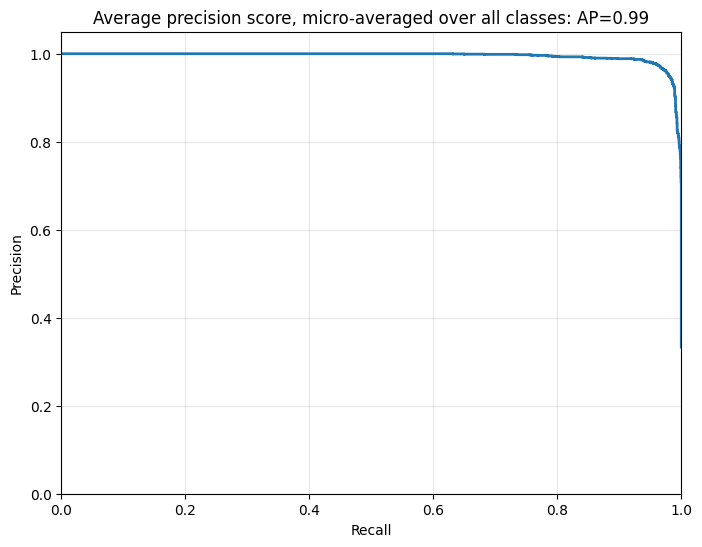

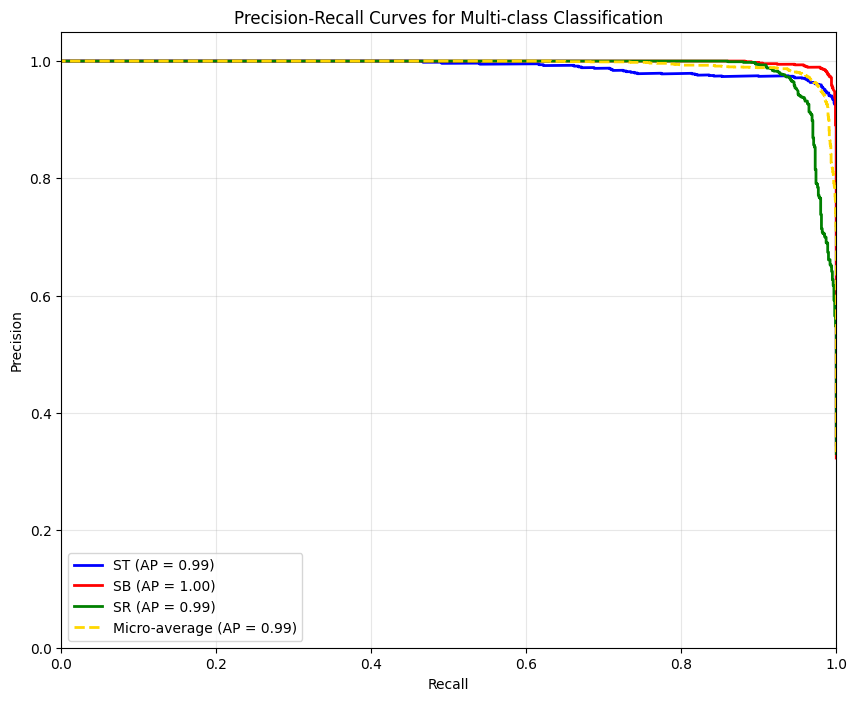

In [17]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()

# For each class, compute PR curve using probability scores
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(
        (np.array(y_true) == i).astype(int),  # Binary true labels for class i
        y_scores[:, i]  # Probability scores for class i
    )
    average_precision[i] = average_precision_score(
        (np.array(y_true) == i).astype(int), 
        y_scores[:, i]
    )

# Micro-average: using probability scores
from sklearn.preprocessing import label_binarize
y_true_binary = label_binarize(y_true, classes=[0, 1, 2])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_true_binary.ravel(),
    y_scores.ravel()
)
average_precision["micro"] = average_precision_score(
    y_true_binary, 
    y_scores,
    average="micro"
)

print('Average precision score, micro-averaged over all classes: {0:0.2f}'
        .format(average_precision["micro"]))

# Plot micro-average PR curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], where='post', linewidth=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.grid(True, alpha=0.3)
plt.show()

# Plot individual class PR curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
class_names = ['ST', 'SB', 'SR']

for i, color, class_name in zip(range(3), colors, class_names):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'{class_name} (AP = {average_precision[i]:0.2f})')

plt.plot(recall['micro'], precision['micro'], color='gold', lw=2, linestyle='--',
         label=f'Micro-average (AP = {average_precision["micro"]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curves for Multi-class Classification')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()

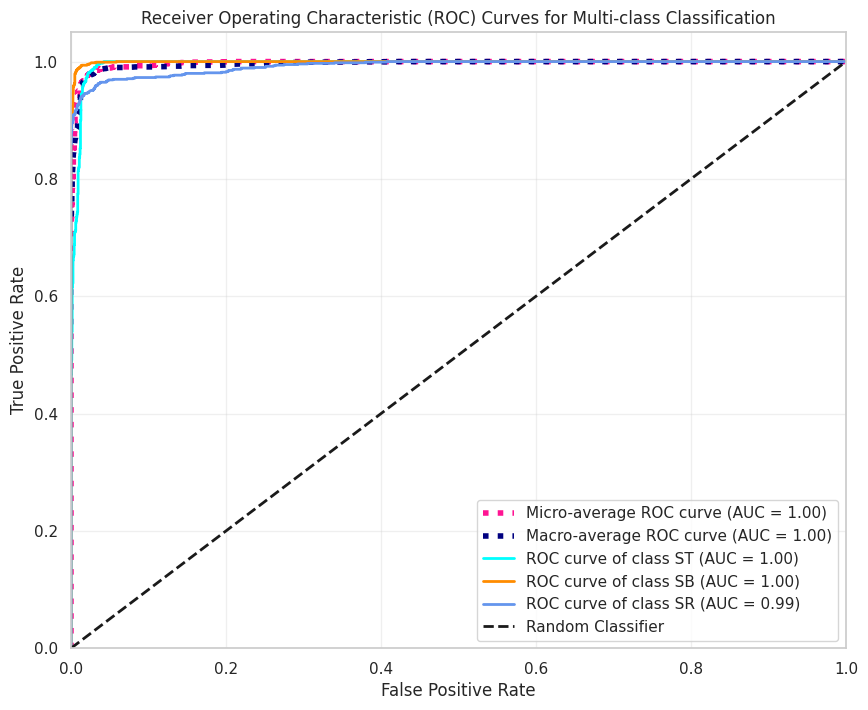

AUC Scores:
Class ST: 0.996
Class SB: 0.999
Class SR: 0.992
Micro-average: 0.997
Macro-average: 0.996


In [19]:
# ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the true labels for multi-class ROC
y_test = label_binarize(y_true, classes=[0, 1, 2])
# Use probability scores (not predictions!)
y_score = y_scores  # This contains the probability scores from softmax

n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

# Plot ROC curve for each class
colors = ['aqua', 'darkorange', 'cornflowerblue']
class_names = ['ST', 'SB', 'SR']

for i, color, class_name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_name} (AUC = {roc_auc[i]:0.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multi-class Classification')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Print AUC scores
print("AUC Scores:")
for i, class_name in enumerate(['ST', 'SB', 'SR']):
    print(f"Class {class_name}: {roc_auc[i]:.3f}")
print(f"Micro-average: {roc_auc['micro']:.3f}")
print(f"Macro-average: {roc_auc['macro']:.3f}")

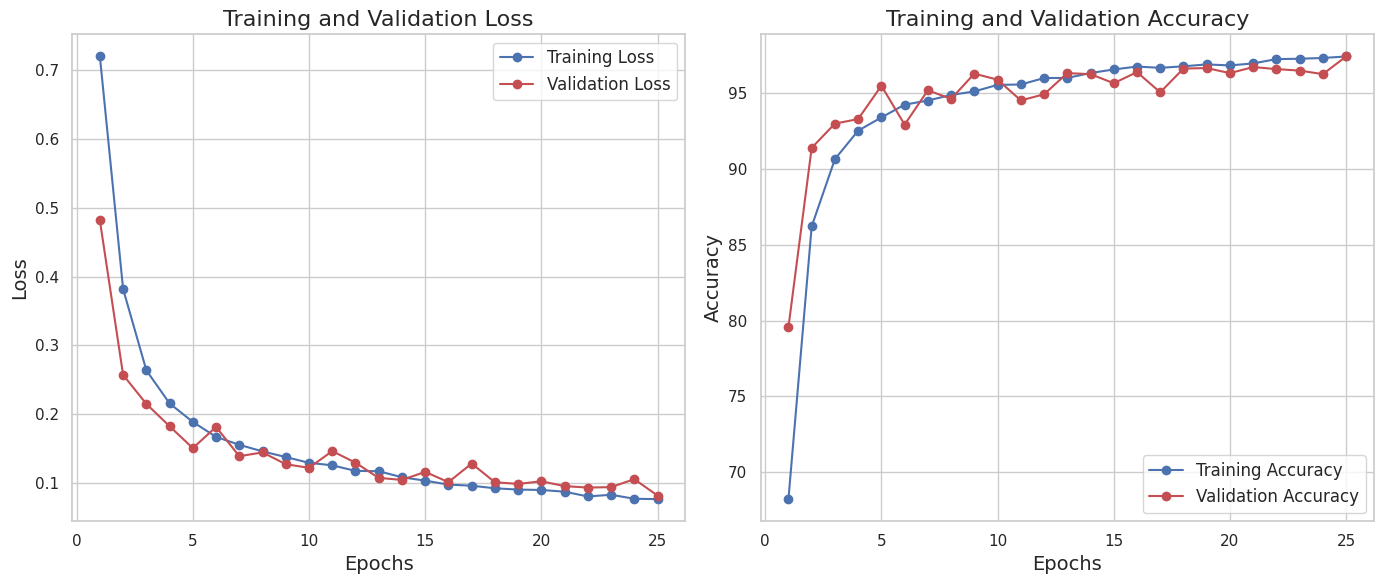

In [18]:
from plots import accuracy_and_validation_plots
epochs_= list(range(1, len(all_train_losses[best_seed])+1))
accuracy_and_validation_plots(epochs_,
    all_train_losses[best_seed],
    all_test_losses[best_seed],
    all_train_acc[best_seed],
    all_test_acc[best_seed]
).plot_figure("accuracy.png")


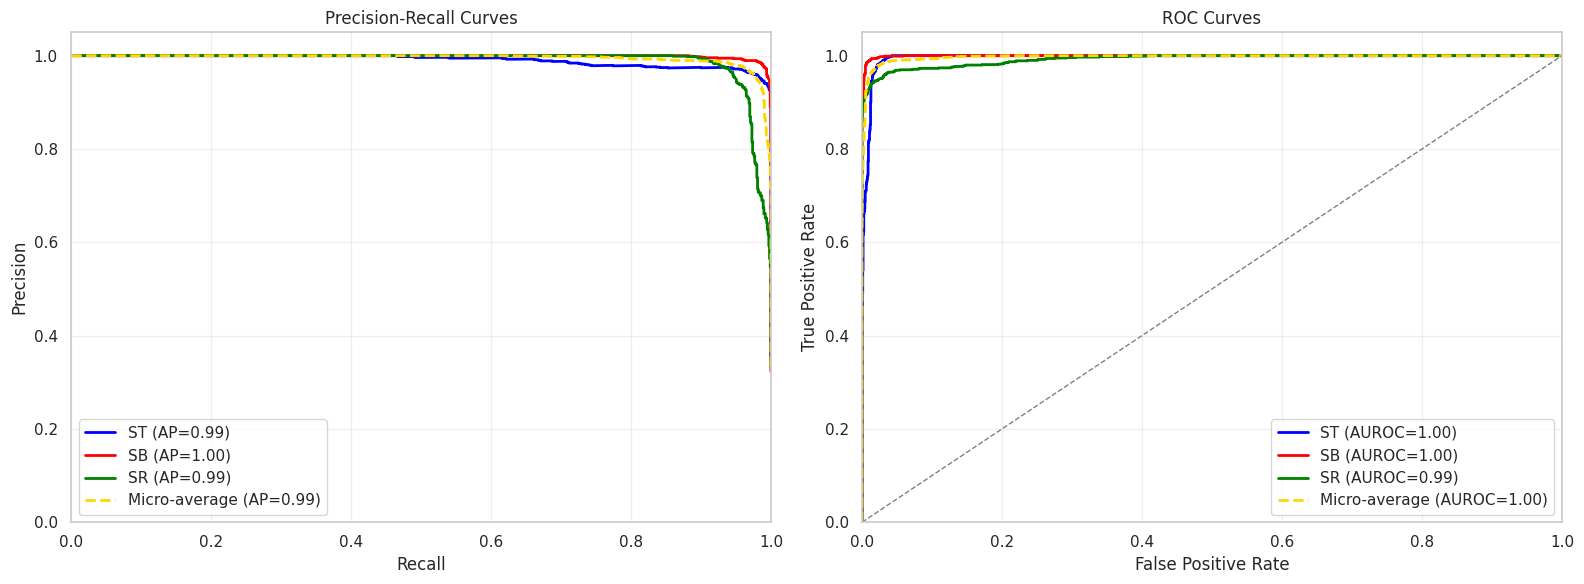

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assume y_true and y_scores are already defined
classes = [0, 1, 2]
class_names = ['ST', 'SB', 'SR']
colors = ['blue', 'red', 'green']

# Binarize the labels for multi-class metrics
y_true_binary = label_binarize(y_true, classes=classes)

# ----------------------
# Precision-Recall Curves
# ----------------------
precision = dict()
recall = dict()
average_precision = dict()

for i in classes:
    precision[i], recall[i], _ = precision_recall_curve(y_true_binary[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_true_binary[:, i], y_scores[:, i])

# Micro-average PR
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true_binary.ravel(), y_scores.ravel())
average_precision["micro"] = average_precision_score(y_true_binary, y_scores, average="micro")

# ----------------------
# ROC Curves
# ----------------------
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in classes:
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binary.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# ----------------------
# Plotting
# ----------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot PRC
ax = axes[0]
for i, color, name in zip(classes, colors, class_names):
    ax.plot(recall[i], precision[i], color=color, lw=2, label=f'{name} (AP={average_precision[i]:0.2f})')
ax.plot(recall['micro'], precision['micro'], color='gold', lw=2, linestyle='--',
        label=f'Micro-average (AP={average_precision["micro"]:0.2f})')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.grid(True, alpha=0.3)
ax.legend(loc='lower left')

# Plot ROC
ax = axes[1]
for i, color, name in zip(classes, colors, class_names):
    ax.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{name} (AUROC={roc_auc[i]:0.2f})')
ax.plot(fpr['micro'], tpr['micro'], color='gold', lw=2, linestyle='--',
        label=f'Micro-average (AUROC={roc_auc["micro"]:0.2f})')
ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()
